<a href="https://colab.research.google.com/github/sunidhib2002/Customer-Churn-/blob/main/Customer_Churn_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd

In [109]:
path = '/content/E_Commerce_Churn_cleaned.csv'

In [110]:
data = pd.read_csv(path)

In [111]:
data.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,50002.0,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,50003.0,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,50005.0,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [112]:
data.drop(columns = ['CustomerID'], inplace = True)

Dropped the column 'Customer ID' as it has nothing to do with churn.

In [113]:
data.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Dividing the dataset and seperating the target column from it.

In [114]:
X = data.loc[:, data.columns != 'Churn']

In [115]:
X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [116]:
X.shape

(5630, 30)

In [117]:
Y = data['Churn']

In [118]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

Dividing the dataset into training and testing dataset.

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

# **Model Training**

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
print('Accuracy Score : ', accuracy_score(y_test, y_pred1) * 100)
print('Confusion_Matrix : \n', confusion_matrix(y_test, y_pred1))
print('Classification Report : \n', classification_report(y_test, y_pred1))

Accuracy Score :  88.09946714031972
Confusion_Matrix : 
 [[1327   54]
 [ 147  161]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1381
         1.0       0.75      0.52      0.62       308

    accuracy                           0.88      1689
   macro avg       0.82      0.74      0.77      1689
weighted avg       0.87      0.88      0.87      1689



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
clf = RandomForestClassifier(random_state = 10)
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred2) * 100)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred2))
print('Classification Report : \n', classification_report(y_test, y_pred2))

Accuracy score :  96.03315571343991
Confusion Matrix : 
 [[1367   14]
 [  53  255]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1381
         1.0       0.95      0.83      0.88       308

    accuracy                           0.96      1689
   macro avg       0.96      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689



Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf = 5)
clf_gini.fit(x_train, y_train)
y_pred3 = clf_gini.predict(x_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred3))
print('Classification Report: \n', classification_report(y_test, y_pred3))

Confusion Matrix: 
 [[1316   65]
 [ 149  159]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1381
         1.0       0.71      0.52      0.60       308

    accuracy                           0.87      1689
   macro avg       0.80      0.73      0.76      1689
weighted avg       0.86      0.87      0.87      1689



AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ada_clf = AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train, y_train)
y_pred4 = ada_clf.predict(x_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred4))
print('Classification Report: \n', classification_report(y_test, y_pred4))

Confusion Matrix: 
 [[1322   59]
 [ 123  185]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1381
         1.0       0.76      0.60      0.67       308

    accuracy                           0.89      1689
   macro avg       0.84      0.78      0.80      1689
weighted avg       0.89      0.89      0.89      1689



Till now, we used different supervised machine learning algorithms like Logistic Regression, Decision Trees, Random Forest and AdaBoost. 
Out of all these algorithms, the performance of Random Forest has the best with an accuracy of 96% and F1-score of 0.87.

We know that this churn prediction datatset is highly imbalance and only 17% of the samples shows churn.
To improve the performance of the algorithms, we can try handling the imbalance of the dataset by certain techniques.  

Handling Data Imbalance

In [130]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [131]:
# counter = Counter(y_train)
# print('Before', counter)
# smt = SMOTE()
# x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
# counter = Counter(y_train_sm)
# print('After', counter)

I tried to balance the dataset using SMOTE Technique before but that didn't gave significant results. The F1-score for all the algorithms was almost the same.

Before SMOTE : <br>
0.0: 3301<br>
1.0: 640<br>
<br>
After SMOTE:<br>
0.0: 3301<br>
1.0: 3301

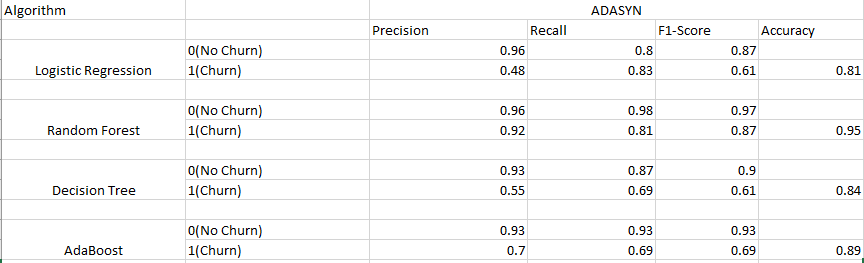

Next, I tried to use ADASYN technique

In [132]:
# from imblearn.over_sampling import ADASYN
# counter = Counter(y_train)
# print('Before', counter)
# ada = ADASYN(random_state = 130, n_neighbors = 3)
# x_train_sm, y_train_sm = ada.fit_resample(x_train, y_train)
# counter = Counter(y_train_sm)
# print('After ', counter) 


Before ADASYN: <br>
0.0: 3301<br>
1.0: 640<br>
<br>
After ADASYN:<br>
0.0: 3301<br>
1.0: 3267

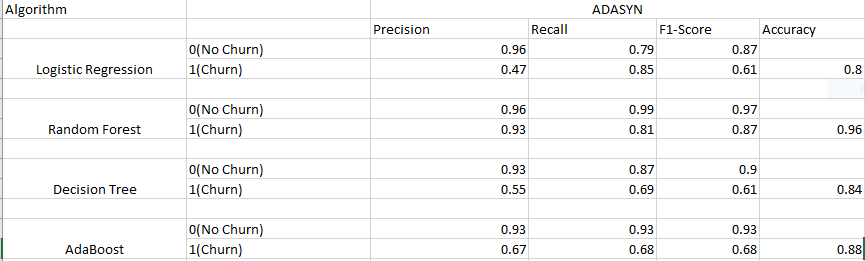

Again the change was not that significant. However, one thing that remained consistent in all the techniques, was Random Forest performed the best.

Random Forest, without any imbalancing technique gave 96% accuracy, So I decided to give with that.

In [133]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
print('accuracy ' ,accuracy_score(y_test, y_pred2) * 100)
print('confusion matrix \n', confusion_matrix(y_test, y_pred2))
print('classification report \n', classification_report(y_test, y_pred2))

accuracy  95.91474245115454
confusion matrix 
 [[1369   12]
 [  57  251]]
classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1381
         1.0       0.95      0.81      0.88       308

    accuracy                           0.96      1689
   macro avg       0.96      0.90      0.93      1689
weighted avg       0.96      0.96      0.96      1689



Next, I tried to see which all features had a huge impact on prediction.

In [134]:
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Tenure                                 0.211367
CashbackAmount                         0.083242
WarehouseToHome                        0.071437
Complain                               0.065197
DaySinceLastOrder                      0.063695
NumberOfAddress                        0.062297
OrderAmountHikeFromlastYear            0.053008
SatisfactionScore                      0.048843
NumberOfDeviceRegistered               0.035211
OrderCount                             0.030491
CouponUsed                             0.027993
PreferedOrderCat_Mobile                0.025038
CityTier                               0.022540
MaritalStatus_Single                   0.022210
HourSpendOnApp                         0.022042
MaritalStatus_Married                  0.014756
PreferredPaymentMode_CC                0.014146
Gender_Male                            0.013646
PreferredPaymentMode_COD               0.013407
Gender_Female                          0.013375
PreferredLoginDevice_Mobile Phone      0

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

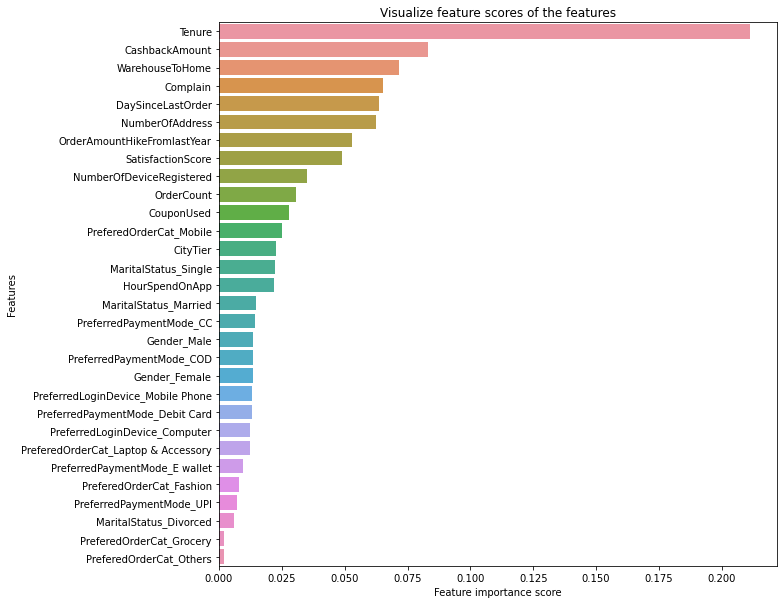

In [136]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [137]:
features = feature_scores.reset_index()
features

,index,0
0,Tenure,0.211367
1,CashbackAmount,0.083242
2,WarehouseToHome,0.071437
3,Complain,0.065197
4,DaySinceLastOrder,0.063695
5,NumberOfAddress,0.062297
6,OrderAmountHikeFromlastYear,0.053008
7,SatisfactionScore,0.048843
8,NumberOfDeviceRegistered,0.035211
9,OrderCount,0.030491


Trying to extract the top20 features: 

In [138]:
top20_features = features.iloc[:20, :]['index'].tolist()

In [139]:
top20_features

['Tenure',
 'CashbackAmount',
 'WarehouseToHome',
 'Complain',
 'DaySinceLastOrder',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'SatisfactionScore',
 'NumberOfDeviceRegistered',
 'OrderCount',
 'CouponUsed',
 'PreferedOrderCat_Mobile',
 'CityTier',
 'MaritalStatus_Single',
 'HourSpendOnApp',
 'MaritalStatus_Married',
 'PreferredPaymentMode_CC',
 'Gender_Male',
 'PreferredPaymentMode_COD',
 'Gender_Female']

In [140]:
X_selected = x_train[top20_features]

In [141]:
x_test_s = x_test[top20_features]

In [142]:
X_selected.head()

,Tenure,CashbackAmount,WarehouseToHome,Complain,DaySinceLastOrder,NumberOfAddress,OrderAmountHikeFromlastYear,SatisfactionScore,NumberOfDeviceRegistered,OrderCount,CouponUsed,PreferedOrderCat_Mobile,CityTier,MaritalStatus_Single,HourSpendOnApp,MaritalStatus_Married,PreferredPaymentMode_CC,Gender_Male,PreferredPaymentMode_COD,Gender_Female
33,13.0,209.0,10.0,0.0,11.0,8.0,11.0,2.0,4.0,2.0,2.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
5467,2.0,161.0,8.0,0.0,3.0,3.0,26.0,5.0,4.0,2.0,2.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0
5364,12.0,152.0,14.0,1.0,8.0,4.0,12.0,3.0,4.0,8.0,2.0,1.0,3.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0
3136,15.0,187.0,17.0,0.0,11.0,9.0,15.0,2.0,4.0,2.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0
3662,1.0,141.0,7.0,0.0,1.0,3.0,16.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0


Training the model with these Top20 features:

In [143]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 10)
clf.fit(X_selected, y_train)
y_pred6 = clf.predict(x_test_s)
print('accuracy ' ,accuracy_score(y_test, y_pred6) * 100)
print('confusion matrix \n', confusion_matrix(y_test, y_pred6))
print('classification report \n', classification_report(y_test, y_pred6))

accuracy  95.32267613972765
confusion matrix 
 [[1366   15]
 [  64  244]]
classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1381
         1.0       0.94      0.79      0.86       308

    accuracy                           0.95      1689
   macro avg       0.95      0.89      0.92      1689
weighted avg       0.95      0.95      0.95      1689



In [144]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

In [145]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(x_train_sm, y_train_sm)
# y_pred1 = lr.predict(x_test)
# print('accurancy : ', accuracy_score(y_test, y_pred1) * 100)
# print('confusion_matrix \n', confusion_matrix(y_test, y_pred1))
# print('classification report \n', classification_report(y_test, y_pred1))

In [146]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# clf.fit(x_train_sm, y_train_sm)
# y_pred2 = clf.predict(x_test)
# print('accuracy ' ,accuracy_score(y_test, y_pred2) * 100)
# print('confusion matrix \n', confusion_matrix(y_test, y_pred2))
# print('classification report \n', classification_report(y_test, y_pred2))

In [147]:
# from sklearn.tree import DecisionTreeClassifier
# clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf = 5)
# clf_gini.fit(x_train_sm, y_train_sm)
# y_pred3 = clf_gini.predict(x_test)
# print('confusion matrix : \n', confusion_matrix(y_test, y_pred3))
# print(classification_report(y_test, y_pred3))

In [148]:
# from sklearn.ensemble import AdaBoostClassifier
# ada_clf = AdaBoostClassifier(n_estimators = 100)
# ada_clf.fit(x_train_sm, y_train_sm)
# y_pred4 = ada_clf.predict(x_test)
# print('confusion matrix \n', confusion_matrix(y_test, y_pred4))
# print(classification_report(y_test, y_pred4))

In [149]:
# accuracy  95.44108940201302
# confusion matrix 
#  [[1365   16]
#  [  61  247]]
# classification report 
#                precision    recall  f1-score   support

#          0.0       0.96      0.99      0.97      1381
#          1.0       0.94      0.80      0.87       308

#     accuracy                           0.95      1689
#    macro avg       0.95      0.90      0.92      1689
# weighted avg       0.95      0.95      0.95      1689